## Grafico Parallel Coordidantes

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, HTML



def decada(data):
    if(data[:2] == '19' or data[:2] == '20'):
        return data[:3] + '0s'
    return data
    
    
def region(lat, lng):
    if lat > -27.6307621:
        return 0  # "Norte Grande"
    if lat > -32.759362:
        return 1  # "Norte Chico"
    if lat > -38.0613847:
        return 2  # "Central"
    if lat > -43.7890687:
        return 3  # "Sur"
    if lat > -56:
        return 4  # "Austral"
    else:
        return 5  # "Antartica"


def str_region(n):
    if n == 0:
        return "Norte Grande"
    if n == 1:
        return "Norte Chico"
    if n == 2:
        return "Central"
    if n == 3:
        return "Sur"
    if n == 4:
        return "Austral"
    else:
        return "Antartica"
    

#Transformar los año-mes en año
def año(data):
    if(data[:2] == '19' or data[:2] == '20'):
        return data[:4]
    return data     

#Recibe un nombre de archivo y lo carga como un df 
#asignandole la zona correspondiente y agrupandolo por años
def dfProcesar(carpeta, nombre):

    #dargar dato    
    directory = os.path.dirname(os.getcwd())
    data_path = os.path.join(directory, "data")
    file_path = os.path.join(data_path, carpeta + "/" + nombre + ".txt") #cr2_tasAmon_2018_ghcn.txt

    raw = pd.read_table(file_path, sep=",", index_col=0, na_values=[-9999, "-"],
                        low_memory=False)
    table = raw.transpose()
    groups = table.columns.to_series().groupby(table.dtypes).groups

    table[table.columns.values[14:]] = table[table.columns.values[14:]].apply(pd.to_numeric)
    table[['codigo_estacion', 'latitud', 'longitud', 'codigo_cuenca', 'codigo_sub_cuenca', 'cantidad_observaciones']] = table[
        ['altura', 'latitud', 'longitud', 'codigo_cuenca', 'codigo_sub_cuenca', 'cantidad_observaciones']].apply(
        pd.to_numeric)
    table[['inicio_observaciones', 'fin_observaciones', 'inicio_automatica']] = \
        table[['inicio_observaciones', 'fin_observaciones', 'inicio_automatica']].apply(pd.to_datetime)

    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)



    zona = table[['latitud', 'longitud']].apply(lambda x: region(x['latitud'], x['longitud']), axis=1)

    table['zona'] = zona


    #Agrupar por años
    #lista de años
    listaAnhos = range(1900, 2018)
    listaAnhos = list(map(lambda x : str(x), listaAnhos))
    listaColumnas = ['institucion', 'zona', 'fuente', 'nombre', 'altura', 
                    'latitud' , 'longitud']

    #obtener nombres de las columnas
    columnHeaders = list(table)

    columnYears = list(map(lambda x : año(x), columnHeaders))

    #asignar nuevas columnas
    table3 = table
    table3.columns = columnYears
    table3 = table3.sort_values('latitud', ascending=False) #De norte a sur

    #agrupar por año
    auxgb = table3[listaAnhos].groupby(level=0, axis=1).mean()
    
    table4 = table3[listaColumnas]
    for anho in listaAnhos:
        table4[anho] = auxgb[anho] 
    table4['2018'] = table3['2018']    
    return table4

tasAmon = dfProcesar("cr2_tasAmon_2018_ghcn", "cr2_tasAmon_2018_ghcn")
prAmon = dfProcesar("cr2_prAmon_2018_ghcn", "cr2_prAmon_2018_ghcn")



C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
display(tasAmon.interpolate())

,institucion,zona,fuente,nombre,altura,latitud,longitud,1900,1901,1902,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
COM00080002,GHCN,0,ghcn_ftp,El Embrujo,3,13.3570,-81.358,NaN,NaN,NaN,...,28.447200,28.534500,28.196300,28.229333,28.373917,28.292000,28.516917,28.627833,28.382083,27.024000
CO000080001,GHCN,0,ghcn_ftp,San Andres (Isla)/S,6,12.5830,-81.717,NaN,NaN,NaN,...,27.810333,27.892500,27.594917,27.678083,27.907417,27.872417,28.097917,28.248250,28.180917,26.977000
VE000080405,GHCN,0,ghcn_ftp,La Orchila,3,11.8000,-66.183,NaN,NaN,NaN,...,28.872310,28.381958,28.109375,28.529167,28.832667,28.951708,29.352750,29.108375,28.873000,28.260000
COM00080035,GHCN,0,ghcn_ftp,Almirante Padilla,13,11.5260,-72.926,NaN,NaN,NaN,...,29.934286,28.871417,28.623833,29.380250,29.757917,30.031000,30.607583,29.968500,29.565083,29.543000
VEM00080403,GHCN,0,ghcn_ftp,Jose Leonardo Chirinos,16,11.4150,-69.681,NaN,NaN,NaN,...,29.447000,29.874583,29.632333,29.972250,29.895500,29.704083,31.370500,30.316111,28.626000,29.365000
COM00080009,GHCN,0,ghcn_ftp,Simon Bolivar,7,11.1200,-74.231,NaN,NaN,NaN,...,29.543714,28.849917,28.786333,29.354500,29.278833,29.586333,30.029417,29.671333,29.318500,29.187000
VEM00080421,GHCN,0,ghcn_ftp,Porlamar (Aeropuerto Int. Del,19,10.9170,-63.967,NaN,NaN,NaN,...,28.709857,28.436125,28.159500,28.093500,28.382000,28.848000,29.213292,28.931917,28.591250,28.493500
COM00080028,GHCN,0,ghcn_ftp,Ernesto Cortissoz,30,10.8900,-74.781,NaN,NaN,NaN,...,27.876000,28.022333,27.532667,27.988250,27.987667,28.109667,28.397167,28.192500,27.864000,27.800000
VEM00080415,GHCN,0,ghcn_ftp,Simon Bolivar Intl,72,10.6030,-66.991,NaN,NaN,NaN,...,28.222083,28.108333,26.922583,27.470167,27.162750,27.008250,27.483750,27.644091,28.251909,26.077000
VE000080423,GHCN,0,ghcn_ftp,Guiria,14,10.5830,-62.317,NaN,NaN,NaN,...,27.807417,28.147583,27.755250,28.101917,27.931250,27.685667,28.331667,27.997800,29.325955,26.346714


In [3]:
test1tas = tasAmon[['zona', 'longitud']]
test1tas['altura']=tasAmon['altura'].astype('int64')
test1tas['temp 2018'] = tasAmon['2018']
test1tas['prep 2018'] = prAmon['2018']
test1tas['prep 2018'] = prAmon['2018']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [4]:
#!/usr/bin/python
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def colorList(dfMatrix):
    colorList = []
    colorDict = {0:'r', 1:'y', 2:'g', 3:'c', 4:'b', 5:'m'}
    for data in dfMatrix:
        #display(data)
        #print("zone: " + str(int(data[0])) + " dict: " + colorDict[int(data[0])])
        colorList.append(colorDict[int(data[0])])
    return colorList

def parallel_coordinates(data_sets):
    
    #column names
    dimNames = list(data_sets)
    
    #iterpolate and trasnform panda dataset to matrix
    data_sets = data_sets.interpolate().as_matrix()
    
    #fig config
    style = colorList(data_sets)
    dims = len(data_sets[0])
    x    = range(dims)
    fig, axes = plt.subplots(1, dims-1, sharey=False)
    fig.set_size_inches(18.5, 10.5)

    # Calculate the limits on the data
    min_max_range = list()
    for m in zip(*data_sets):
        mn = min(m)
        mx = max(m)
        if mn == mx:
            mn -= 0.5
            mx = mn + 1.
        r  = float(mx - mn)
        min_max_range.append((mn, mx, r))

    # Normalize the data sets
    norm_data_sets = list()
    for ds in data_sets:
        nds = [(value - min_max_range[dimension][0]) / min_max_range[dimension][2] 
                for dimension,value in enumerate(ds)] 
        norm_data_sets.append(nds)
    data_sets = norm_data_sets

    # Plot the datasets on all the subplots
    for i, ax in enumerate(axes):
        for dsi, d in enumerate(data_sets):
            #print(dsi)
            #print(d)
            ax.plot(x, d, style[dsi])
        ax.set_xlim([x[i], x[i+1]])

    # Set the x axis ticks 

    for dimension, (axx,xx) in enumerate(zip(axes, x[:-1])):
        axx.xaxis.set_major_locator(ticker.FixedLocator([xx]))
        ticks = len(axx.get_yticklabels())
        labels = list()
        step = min_max_range[dimension][2] / (ticks - 1)
        mn   = min_max_range[dimension][0]
        for i in range(ticks):
            v = mn + i*step
            if dimNames[dimension] == 'zona':
                labels.append(str_region(i-1))
            else:
                labels.append('%4.2f' % v)
        axx.set_yticklabels(labels)
        axx.set_xticklabels([str(dimNames[dimension])])




    # Move the final axis' ticks to the right-hand side
    axx = plt.twinx(axes[-1])
    dimension += 1
    axx.xaxis.set_major_locator(ticker.FixedLocator([x[-2], x[-1]]))
    ticks = len(axx.get_yticklabels())
    step = min_max_range[dimension][2] / (ticks - 1)
    mn   = min_max_range[dimension][0]
    labels = ['%4.2f' % (mn + i*step) for i in range(ticks)]
    axx.set_yticklabels(labels)
    axx.set_xticklabels([str(dimNames[dimension-1]),str(dimNames[dimension])])
    
    # Stack the subplots 
    plt.subplots_adjust(wspace=0)
    
    return plt


0.0
5.0
-178.6
174.167
-1000.0
4585.0
-36.853
33.973
0.0
1037.65


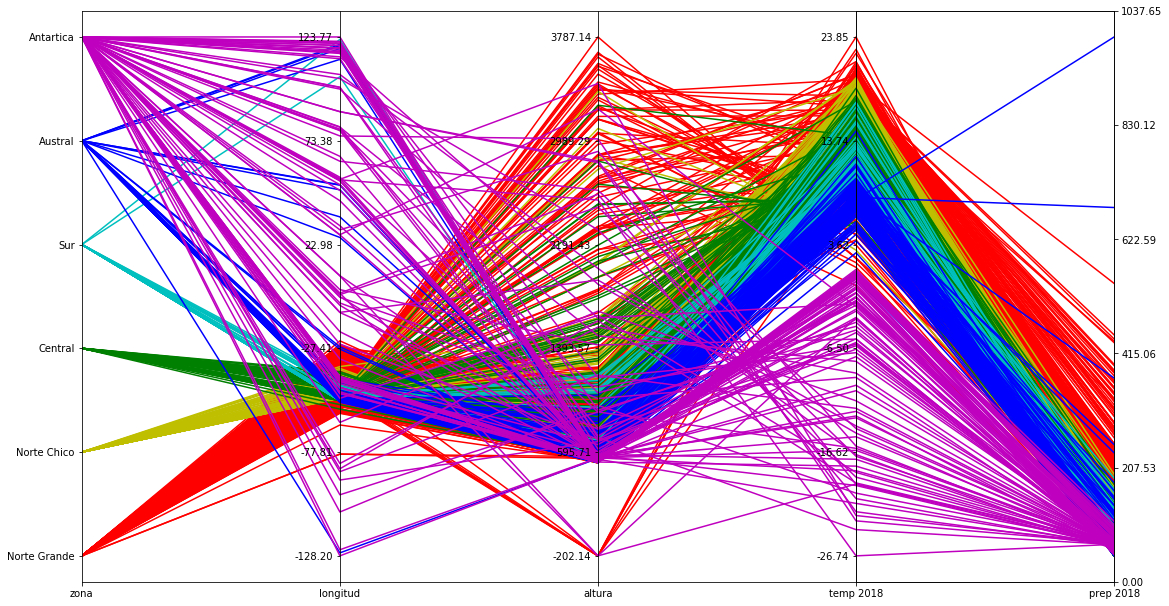

In [5]:

parallel_coordinates(test1tas).show()

    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


0.0
5.0
-52.72541666666666
29.958199999999998
-36.853
33.973


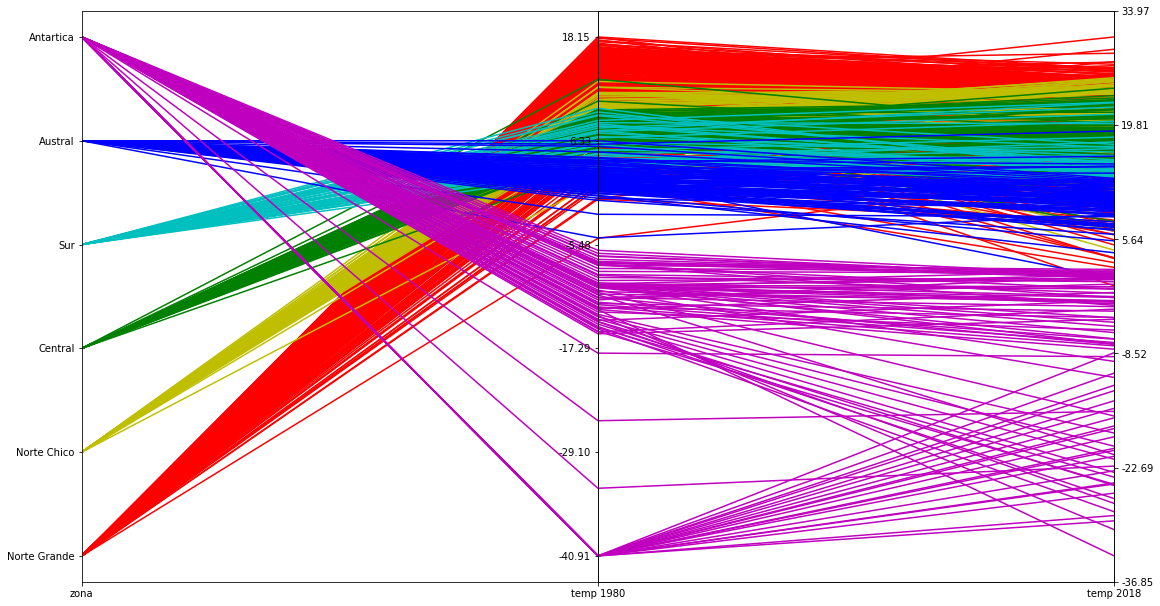

In [11]:
#Grafico 2 
test2tas = tasAmon[['zona']]
test2tas['temp 1980'] = tasAmon['1980']
test2tas['temp 2018'] = tasAmon['2018']
parallel_coordinates(test2tas).show()